# Importing the Required libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import math
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.ensemble import StackingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import shap
import pyswarms as ps
from pyswarms.single import GlobalBestPSO
from pyswarms.utils.plotters import plot_cost_history
from warnings import filterwarnings
filterwarnings('ignore')

### **Reading the Data file**

In [10]:
df = pd.read_csv("C:/Users/chhon/Downloads/mw_pw_profiles.csv",low_memory=False)
df.head()

,Unnamed: 0,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,...,key_pulse,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,...,NaN,NaN,NaN,NaN,NaN,NaN,[],5,8,17
1,1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,...,NaN,NaN,NaN,NaN,NaN,NaN,[],3,0,7
2,2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],1,0,5
3,3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4
4,4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1


In [11]:
df.columns

Index(['Unnamed: 0', 'player_id', 'match_id', 'gender', 'balls_per_over',
       'start_date', 'series_name', 'match_type', 'name_x', 'runs_scored',
       'player_out', 'balls_faced', 'fours_scored', 'sixes_scored',
       'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done',
       'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled',
       'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y',
       'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams',
       'fantasy_score_batting', 'fantasy_sc

### **Removing unnecessary columns**

In [12]:
df.drop(['Unnamed: 0','gender', 'balls_per_over', 'series_name', 'name_x', 'name_y', 'unique_name','key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams', ], axis = 1, inplace = True)
df.columns

Index(['player_id', 'match_id', 'start_date', 'match_type', 'runs_scored',
       'player_out', 'balls_faced', 'fours_scored', 'sixes_scored',
       'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done',
       'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled',
       'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team',
       'fantasy_score_batting', 'fantasy_score_bowling',
       'fantasy_score_total'],
      dtype='object')

### **Preprocessing**

In [13]:
df.isnull().sum()

player_id                0
match_id                 0
start_date               0
match_type               0
runs_scored              0
player_out               0
balls_faced              0
fours_scored             0
sixes_scored             0
catches_taken            0
run_out_direct           0
run_out_throw            0
stumpings_done           0
out_kind                 0
dot_balls_as_batsman     0
order_seen               0
balls_bowled             0
runs_conceded            0
wickets_taken            0
bowled_done              0
lbw_done                 0
maidens                  0
dot_balls_as_bowler      0
player_team              0
opposition_team          0
fantasy_score_batting    0
fantasy_score_bowling    0
fantasy_score_total      0
dtype: int64

### **Sorting according to the start date**

In [14]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df.sort_values(by=['start_date'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,f44af07f,63963,2001-12-19,Test,39,1,93,6,0,0,...,0,0,0,2,39,England,India,45,0,49
1,de8cce37,63963,2001-12-19,Test,12,1,18,2,0,1,...,0,0,0,0,0,India,England,14,8,26
2,b6cd714f,63963,2001-12-19,Test,4,1,16,0,0,0,...,4,0,1,5,96,India,England,4,76,84
3,725529bc,63963,2001-12-19,Test,0,1,3,0,0,0,...,0,0,0,3,70,India,England,-4,0,0
4,0184dc35,63963,2001-12-19,Test,3,1,61,0,0,1,...,0,0,0,0,0,India,England,3,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,4e38a3d6,1485778,2025-05-20,T20,4,1,10,0,0,0,...,0,0,0,0,0,Nepal,Thailand,-2,0,2
416708,bd36bc39,1485778,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,8,Thailand,Nepal,0,16,20
416709,f6ddfe08,1485778,2025-05-20,T20,0,0,0,0,0,1,...,0,0,0,0,10,Thailand,Nepal,0,12,16
416710,a2f46292,1473500,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,6,Chennai Super Kings,Rajasthan Royals,0,-4,0


### **Feature Generation (Separate Dataframe)**

**Preprocessing the categorical data**

In [15]:
df_features = df.copy()
lbenc = LabelEncoder()
df_features['player_id'] = lbenc.fit_transform(df_features['player_id'])
df_features = pd.get_dummies(df_features, columns = ['match_type'], drop_first = True, dtype = int)

**Generating some new features**

In [16]:
df_features['strike_rate'] = (df['runs_scored']/df['balls_faced'])*100
df_features['economy_rate'] = (df['runs_conceded']/df['balls_bowled'])*100
df_features['all_rounder']  = (df_features['runs_scored']/50 + df_features['wickets_taken']/5)*36
df_features['impact_bat'] = (df_features['runs_scored']*10 + df_features['fours_scored']*2 + df_features['sixes_scored']*3)/df_features['balls_faced']
df_features['impact_bowl'] = (df_features['runs_conceded']*5 + df_features['dot_balls_as_bowler']*1.5 + df_features['maidens']*3)/df_features['balls_bowled']
df_features['fielding_impact'] = (df_features['catches_taken']*3 + (df_features['run_out_direct']+df_features['run_out_throw'])*2 + df_features['stumpings_done']*2)/df_features['balls_faced']

**Dropping some more values**

In [17]:
df_features.drop(['runs_conceded','balls_faced','balls_bowled','player_out','out_kind',
                  'dot_balls_as_batsman','dot_balls_as_bowler',
                  'fantasy_score_bowling','fantasy_score_batting'],inplace =True,axis =1)

In [18]:
df_features.columns

Index(['player_id', 'match_id', 'start_date', 'runs_scored', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'order_seen', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'player_team', 'opposition_team',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'strike_rate',
       'economy_rate', 'all_rounder', 'impact_bat', 'impact_bowl',
       'fielding_impact'],
      dtype='object')

### **Weighted Moving Average**
WMA (Weighted Moving Average) is a type of moving average that assigns more importance (weight) to recent data points when calculating the average. The weights are the hyperparameters here.

For a data series $ P = [P_1, P_2, ..., P_n]  $ and a window size of $ n $ :

$$
\text{WMA}_t = \frac{\sum_{i=1}^{n} w_i \cdot P_{t - n + i}}{\sum_{i=1}^{n} w_i}
$$

Where:
- $w_i $ are the weights (typically: $ w_i = i $)
- $P_{t - n + i} $ is the value $ i $ steps back from time $ t $

---

In [19]:
def wma(col,span): # Weighted Moving Average function
  weights = np.array([i ** math.e for i in range(1, span + 1)]) # Custom wieghts :)
  return col.rolling(span).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

sel_feat = [
    'runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken',
    'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken',
    'bowled_done', 'lbw_done', 'maidens', 'strike_rate', 'economy_rate','all_rounder','impact_bat','impact_bowl'
]
span = [1,5,10]
for col in sel_feat:
  for n in span:
    col_name = f"{col}_{n}"
    df_features[col_name] = (
            df_features
            .groupby('player_id')[col]
            .transform(lambda x: wma(x.shift(1), n))
        )

In [20]:
df_features.shape
df_features.columns

Index(['player_id', 'match_id', 'start_date', 'runs_scored', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'order_seen', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'player_team', 'opposition_team',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'strike_rate',
       'economy_rate', 'all_rounder', 'impact_bat', 'impact_bowl',
       'fielding_impact', 'runs_scored_1', 'runs_scored_5', 'runs_scored_10',
       'fours_scored_1', 'fours_scored_5', 'fours_scored_10', 'sixes_scored_1',
       'sixes_scored_5', 'sixes_scored_10', 'catches_taken_1',
       'catches_taken_5', 'catches_taken_10', 'run_out_direct_1',
       'run_out_direct_5', 'run_out_direct_10', 'run_out_throw_1',
       'run_out_throw_5', 'run_out_throw_10', 'stumpings_done_1',
       'stumpings_done_5', 'stumpings_done_10', 'wickets_taken_1',
       'wickets_

In [21]:
df_features.drop(['runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken',
    'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken',
    'bowled_done', 'lbw_done', 'maidens','player_team','opposition_team', 'strike_rate', 'economy_rate','all_rounder','fielding_impact'],inplace = True, axis = 1)
df_features.fillna(0, inplace=True)
df_features.sort_values(by=['start_date'], inplace=True)
df_features.reset_index(drop=True, inplace=True)

In [22]:
df_features.shape

(416712, 60)

In [23]:
df_features.columns

Index(['player_id', 'match_id', 'start_date', 'order_seen',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'impact_bat',
       'impact_bowl', 'runs_scored_1', 'runs_scored_5', 'runs_scored_10',
       'fours_scored_1', 'fours_scored_5', 'fours_scored_10', 'sixes_scored_1',
       'sixes_scored_5', 'sixes_scored_10', 'catches_taken_1',
       'catches_taken_5', 'catches_taken_10', 'run_out_direct_1',
       'run_out_direct_5', 'run_out_direct_10', 'run_out_throw_1',
       'run_out_throw_5', 'run_out_throw_10', 'stumpings_done_1',
       'stumpings_done_5', 'stumpings_done_10', 'wickets_taken_1',
       'wickets_taken_5', 'wickets_taken_10', 'bowled_done_1', 'bowled_done_5',
       'bowled_done_10', 'lbw_done_1', 'lbw_done_5', 'lbw_done_10',
       'maidens_1', 'maidens_5', 'maidens_10', 'strike_rate_1',
       'strike_rate_5', 'strike_rate_10', 'economy_rate_1', 'economy_rate_5',
       'economy_rate_10',

###**Comparison between final feature generated Dataframe and Old Dataframe**

In [24]:
df

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,f44af07f,63963,2001-12-19,Test,39,1,93,6,0,0,...,0,0,0,2,39,England,India,45,0,49
1,de8cce37,63963,2001-12-19,Test,12,1,18,2,0,1,...,0,0,0,0,0,India,England,14,8,26
2,b6cd714f,63963,2001-12-19,Test,4,1,16,0,0,0,...,4,0,1,5,96,India,England,4,76,84
3,725529bc,63963,2001-12-19,Test,0,1,3,0,0,0,...,0,0,0,3,70,India,England,-4,0,0
4,0184dc35,63963,2001-12-19,Test,3,1,61,0,0,1,...,0,0,0,0,0,India,England,3,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,4e38a3d6,1485778,2025-05-20,T20,4,1,10,0,0,0,...,0,0,0,0,0,Nepal,Thailand,-2,0,2
416708,bd36bc39,1485778,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,8,Thailand,Nepal,0,16,20
416709,f6ddfe08,1485778,2025-05-20,T20,0,0,0,0,0,1,...,0,0,0,0,10,Thailand,Nepal,0,12,16
416710,a2f46292,1473500,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,6,Chennai Super Kings,Rajasthan Royals,0,-4,0


In [25]:
df_features

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10,impact_bat_1,impact_bat_5,impact_bat_10,impact_bowl_1,impact_bowl_5,impact_bowl_10
0,11182,63963,2001-12-19,7,49,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1878,63963,2001-12-19,0,44,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,10153,63963,2001-12-19,6,84,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,11344,63963,2001-12-19,3,62,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10707,63963,2001-12-19,2,38,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,0.000000,10.80,11.065393,12.664247,5.923077,6.369151,6.310701,0.000000,0.000000,0.000000
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,72.467429,16.56,27.788399,26.730006,10.153846,0.000000,0.000000,3.400000,4.080662,4.468867
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,89.922170,15.84,18.496945,16.810381,1.818182,0.000000,0.000000,4.016129,4.928762,5.207377
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,0.000000,0.00,9.602657,15.384954,0.000000,5.474121,7.157930,0.000000,0.000000,0.000000


###**Dividing the Datasets**

In [26]:
df_features['start_date'] = pd.to_datetime(df_features['start_date'], errors='coerce')
zipper = pd.to_datetime('2023-08-21')
df_train = df_features[df_features['start_date'] < zipper]
df_test = df_features[df_features['start_date'] >= zipper]

In [27]:
df_train

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10,impact_bat_1,impact_bat_5,impact_bat_10,impact_bowl_1,impact_bowl_5,impact_bowl_10
0,11182,63963,2001-12-19,7,49,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1878,63963,2001-12-19,0,44,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,10153,63963,2001-12-19,6,84,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,11344,63963,2001-12-19,3,62,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,10707,63963,2001-12-19,2,38,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333487,9678,1377729,2023-08-20,0,56,0,0,0,1,0,...,87.457135,14.40,9.708032,10.637781,0.0,0.000000,0.000000,4.729167,5.017158,5.066719
333488,2628,1347553,2023-08-20,0,7,0,0,1,0,0,...,123.540209,7.92,6.702697,6.682755,11.0,0.000000,0.000000,5.162791,5.972344,6.923545
333489,7353,1347550,2023-08-20,0,122,0,0,1,0,0,...,0.000000,0.00,2.753214,7.907165,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
333490,2981,1347550,2023-08-20,0,135,0,0,1,0,0,...,58.677908,23.76,22.567788,22.708353,15.0,10.576231,8.564759,2.593750,3.728169,4.002677


In [28]:
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10,impact_bat_1,impact_bat_5,impact_bat_10,impact_bowl_1,impact_bowl_5,impact_bowl_10
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,121.870861,15.12,19.143310,19.371102,12.588235,11.909471,0.000000,6.450000,6.075575,6.704745
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,0.000000,19.44,11.277770,9.976343,20.071429,12.381189,11.244889,0.000000,0.000000,0.000000
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,0.000000,10.08,18.842858,20.188834,6.173913,6.876633,7.019944,0.000000,0.000000,0.000000
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,0.000000,18.72,13.866873,12.194887,8.571429,0.000000,0.000000,7.437500,6.423762,0.000000
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,0.000000,5.76,14.034379,23.076988,10.250000,12.357847,12.411139,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,0.000000,10.80,11.065393,12.664247,5.923077,6.369151,6.310701,0.000000,0.000000,0.000000
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,72.467429,16.56,27.788399,26.730006,10.153846,0.000000,0.000000,3.400000,4.080662,4.468867
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,89.922170,15.84,18.496945,16.810381,1.818182,0.000000,0.000000,4.016129,4.928762,5.207377
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,0.000000,0.00,9.602657,15.384954,0.000000,5.474121,7.157930,0.000000,0.000000,0.000000


In [29]:
X_train = df_train.drop(['fantasy_score_total', 'match_id', 'start_date'], axis = 1)
y_train = df_train['fantasy_score_total']

In [30]:
X_test = df_test.drop(['fantasy_score_total', 'match_id', 'start_date'], axis = 1)
y_test = df_test['fantasy_score_total']

In [31]:
X_train.shape

(333492, 57)

In [32]:
y_train.shape

(333492,)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333492 entries, 0 to 333491
Data columns (total 57 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   player_id          333492 non-null  int32  
 1   order_seen         333492 non-null  int64  
 2   match_type_MDM     333492 non-null  int32  
 3   match_type_ODI     333492 non-null  int32  
 4   match_type_ODM     333492 non-null  int32  
 5   match_type_T20     333492 non-null  int32  
 6   match_type_Test    333492 non-null  int32  
 7   impact_bat         333492 non-null  float64
 8   impact_bowl        333492 non-null  float64
 9   runs_scored_1      333492 non-null  float64
 10  runs_scored_5      333492 non-null  float64
 11  runs_scored_10     333492 non-null  float64
 12  fours_scored_1     333492 non-null  float64
 13  fours_scored_5     333492 non-null  float64
 14  fours_scored_10    333492 non-null  float64
 15  sixes_scored_1     333492 non-null  float64
 16  sixes_s

## **XGBoost**

**Applying model**

In [34]:
xg = XGBRegressor(n_estimators=500, learning_rate=0.04, max_depth  = 5,random_state = 42)
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.04, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
predicted_fst = xg.predict(X_test)

In [36]:
print("RMSE:", mean_squared_error(y_test, predicted_fst))
print("R2 Score:", r2_score(y_test, predicted_fst))

RMSE: 987.3715209960938
R2 Score: 0.4234076142311096


In [37]:
df_test['predicted_fst'] = predicted_fst
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,all_rounder_1,all_rounder_5,all_rounder_10,impact_bat_1,impact_bat_5,impact_bat_10,impact_bowl_1,impact_bowl_5,impact_bowl_10,predicted_fst
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,15.12,19.143310,19.371102,12.588235,11.909471,0.000000,6.450000,6.075575,6.704745,21.924402
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,19.44,11.277770,9.976343,20.071429,12.381189,11.244889,0.000000,0.000000,0.000000,17.793270
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,10.08,18.842858,20.188834,6.173913,6.876633,7.019944,0.000000,0.000000,0.000000,60.695557
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,18.72,13.866873,12.194887,8.571429,0.000000,0.000000,7.437500,6.423762,0.000000,51.737450
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,5.76,14.034379,23.076988,10.250000,12.357847,12.411139,0.000000,0.000000,0.000000,43.977154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,10.80,11.065393,12.664247,5.923077,6.369151,6.310701,0.000000,0.000000,0.000000,43.985821
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,16.56,27.788399,26.730006,10.153846,0.000000,0.000000,3.400000,4.080662,4.468867,73.483208
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,15.84,18.496945,16.810381,1.818182,0.000000,0.000000,4.016129,4.928762,5.207377,55.774311
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,0.00,9.602657,15.384954,0.000000,5.474121,7.157930,0.000000,0.000000,0.000000,52.983269


**Performance Analysis**

In [38]:
eval_df = (
    df_test.groupby('match_id').apply(
        lambda x : pd.Series({
            'sum_top11_actual' : x['fantasy_score_total'].nlargest(11).sum(),
            'sum_top11_predict' : x['predicted_fst'].nlargest(11).sum()
        })
    ).reset_index()
)
eval_df

,match_id,sum_top11_actual,sum_top11_predict
0,1336048,643.0,625.639282
1,1336049,745.0,656.025818
2,1336050,772.0,614.417297
3,1336051,697.0,657.206482
4,1336052,891.0,721.093811
...,...,...,...
3755,1484052,762.0,711.147644
3756,1485778,649.0,583.248901
3757,1486225,846.0,645.032898
3758,1486227,688.0,602.258789


In [39]:
eval_df['abs_%_error'] = (
    (eval_df['sum_top11_predict'] - eval_df['sum_top11_actual']).abs() /
    eval_df['sum_top11_actual']
) * 100
eval_df['_%_error'] = (
    (eval_df['sum_top11_predict'] - eval_df['sum_top11_actual']) /
    eval_df['sum_top11_actual']
) * 100
mean_abs_percentage_error = eval_df['abs_%_error'].mean()
mean_percentage_error = eval_df['_%_error'].mean()
print(f"Mean Absolute % Error: {mean_abs_percentage_error:.2f}")
print(f"Mean % Error: {mean_percentage_error:.2f}")

Mean Absolute % Error: 17.29
Mean % Error: -11.55


In [40]:
eval_df

,match_id,sum_top11_actual,sum_top11_predict,abs_%_error,_%_error
0,1336048,643.0,625.639282,2.699956,-2.699956
1,1336049,745.0,656.025818,11.942843,-11.942843
2,1336050,772.0,614.417297,20.412267,-20.412267
3,1336051,697.0,657.206482,5.709257,-5.709257
4,1336052,891.0,721.093811,19.069157,-19.069157
...,...,...,...,...,...
3755,1484052,762.0,711.147644,6.673538,-6.673538
3756,1485778,649.0,583.248901,10.131140,-10.131140
3757,1486225,846.0,645.032898,23.754977,-23.754977
3758,1486227,688.0,602.258789,12.462385,-12.462385


**Plot between actual v/s predicted fantasy scores**

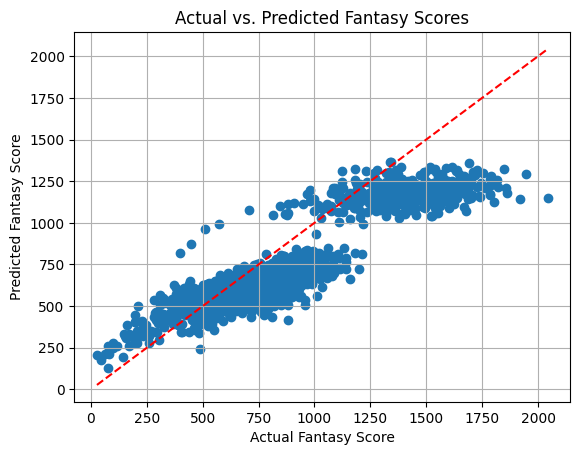

In [41]:
plt.scatter(eval_df['sum_top11_actual'], eval_df['sum_top11_predict'])
plt.plot([eval_df['sum_top11_actual'].min(),eval_df['sum_top11_actual'].max()],[eval_df['sum_top11_actual'].min(),eval_df['sum_top11_actual'].max()],'r--')
plt.xlabel('Actual Fantasy Score')
plt.ylabel('Predicted Fantasy Score')
plt.title('Actual vs. Predicted Fantasy Scores')
plt.grid()
plt.show()

**Validation with SHAP values**

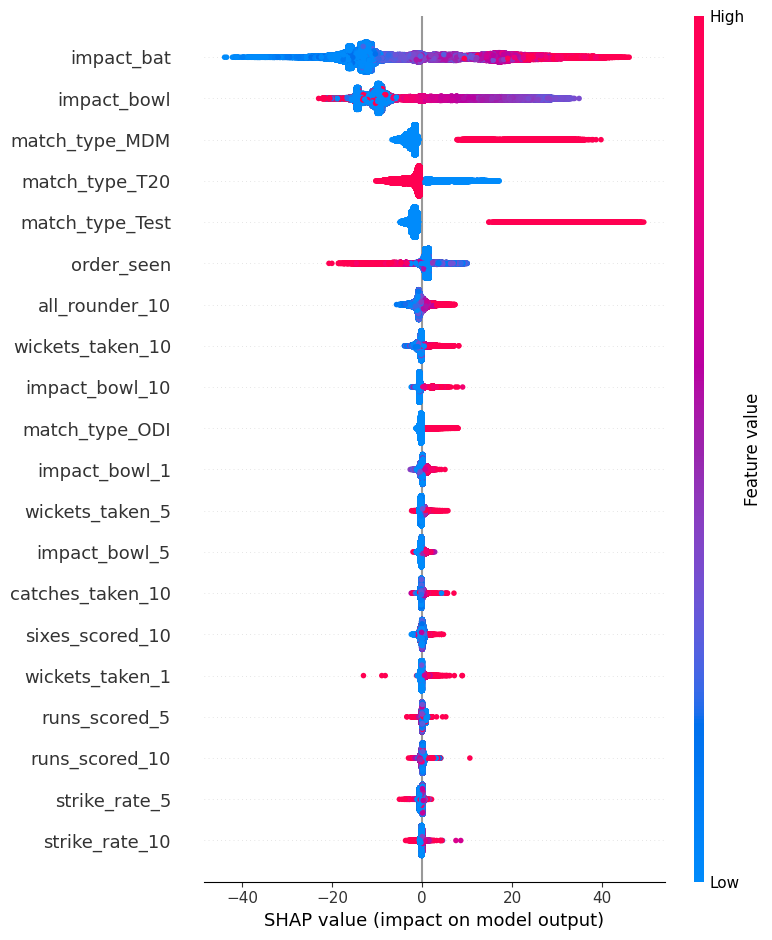

In [42]:
explainer = shap.TreeExplainer(xg)
explain = explainer(X_test)
shap.summary_plot(explain, X_test) #Summary Plot

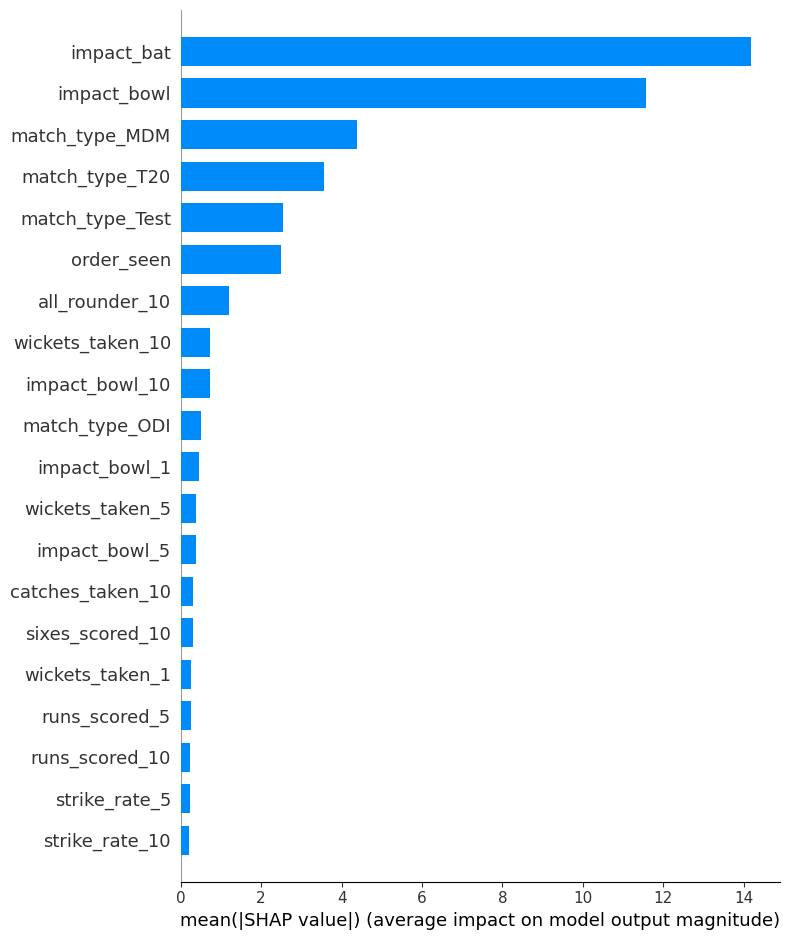

In [43]:
shap.summary_plot(explain,X_test,plot_type='bar') # Mean absolute SHAP values plot

## **Recursive Feature Elimination (with RFECV)**

In [44]:
std = StandardScaler() #Scaling
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [46]:
xg2 = XGBRegressor(n_estimators=500, learning_rate=0.04, max_depth  = 5,random_state = 42)
rfecv = RFECV(estimator=xg2, step=1, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
rfecv.fit(X_train_scaled, y_train)

RFECV(cv=5,
      estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, device=None,
                             early_stopping_rounds=None,
                             enable_categorical=False, eval_metric=None,
                             feature_types=None, feature_weights=None,
                             gamma=None, grow_policy=None, importance_type=None,
                             interaction_constraints=None, learning_rate=0.04,
                             max_bin=None, max_cat_threshold=None,
                             max_cat_to_onehot=None, max_delta_step=None,
                             max_depth=5, max_leaves=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, multi_strategy=None,
                             n_estimators=500, n_jobs=None,
                             num_parallel_tree=None, ...),
      n_jobs=-1, scoring='neg_mean_squared_error')

In [47]:
print(f"Number of optimal features: {rfecv.n_features_}")
print("Selected features:", X_train.columns[rfecv.support_].tolist())

Number of optimal features: 11
Selected features: ['order_seen', 'match_type_MDM', 'match_type_ODI', 'match_type_ODM', 'match_type_T20', 'match_type_Test', 'impact_bat', 'impact_bowl', 'wickets_taken_10', 'all_rounder_10', 'impact_bowl_5']


In [48]:
X_train_sel = rfecv.transform(X_train_scaled)
X_test_sel = rfecv.transform(X_test_scaled)
xg2.fit(X_train_sel, y_train)
predicted_fst_2 = xg2.predict(X_test_sel)
print("RMSE :",mean_squared_error(y_test, predicted_fst_2))
print("R2 Score:", r2_score(y_test, predicted_fst_2))

RMSE : 986.5996704101562
R2 Score: 0.4238583445549011


**Performance Analysis**

In [49]:
df_test['predicted_fst_2'] = predicted_fst_2
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,all_rounder_5,all_rounder_10,impact_bat_1,impact_bat_5,impact_bat_10,impact_bowl_1,impact_bowl_5,impact_bowl_10,predicted_fst,predicted_fst_2
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,19.143310,19.371102,12.588235,11.909471,0.000000,6.450000,6.075575,6.704745,21.924402,21.271776
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,11.277770,9.976343,20.071429,12.381189,11.244889,0.000000,0.000000,0.000000,17.793270,20.673748
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,18.842858,20.188834,6.173913,6.876633,7.019944,0.000000,0.000000,0.000000,60.695557,60.152740
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,13.866873,12.194887,8.571429,0.000000,0.000000,7.437500,6.423762,0.000000,51.737450,49.880016
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,14.034379,23.076988,10.250000,12.357847,12.411139,0.000000,0.000000,0.000000,43.977154,44.190674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,11.065393,12.664247,5.923077,6.369151,6.310701,0.000000,0.000000,0.000000,43.985821,46.110592
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,27.788399,26.730006,10.153846,0.000000,0.000000,3.400000,4.080662,4.468867,73.483208,77.250008
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,18.496945,16.810381,1.818182,0.000000,0.000000,4.016129,4.928762,5.207377,55.774311,52.141155
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,9.602657,15.384954,0.000000,5.474121,7.157930,0.000000,0.000000,0.000000,52.983269,48.500816


In [50]:
eval_df = (

    df_test.groupby('match_id').apply(

        lambda x: pd.Series({

            'sum_top11_actual' : x['fantasy_score_total'].nlargest(11).sum(),
            'sum_top11_predict_1' : x['predicted_fst'].nlargest(11).sum(),
            'sum_top11_predict_2' : x['predicted_fst_2'].nlargest(11).sum(),

        })

    ).reset_index()

)
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2
0,1336048,643.0,625.639282,608.585693
1,1336049,745.0,656.025818,654.659607
2,1336050,772.0,614.417297,625.149292
3,1336051,697.0,657.206482,656.651855
4,1336052,891.0,721.093811,724.724243
...,...,...,...,...
3755,1484052,762.0,711.147644,705.573425
3756,1485778,649.0,583.248901,585.730408
3757,1486225,846.0,645.032898,662.575378
3758,1486227,688.0,602.258789,594.463135


In [51]:
eval_df['abs_%_error_2'] = (
    (eval_df['sum_top11_predict_2'] - eval_df['sum_top11_actual']).abs() /
    eval_df['sum_top11_actual']
) * 100
eval_df['_%_error_2'] = (
    (eval_df['sum_top11_predict_2'] - eval_df['sum_top11_actual']) /
    eval_df['sum_top11_actual']
) * 100
mean_abs_percentage_error = eval_df['abs_%_error_2'].mean()
mean_percentage_error = eval_df['_%_error_2'].mean()
print(f"Mean Absolute % Error: {mean_abs_percentage_error:.2f}")
print(f"Mean % Error: {mean_percentage_error:.2f}")

Mean Absolute % Error: 17.19
Mean % Error: -11.56


In [52]:
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2,abs_%_error_2,_%_error_2
0,1336048,643.0,625.639282,608.585693,5.352147,-5.352147
1,1336049,745.0,656.025818,654.659607,12.126227,-12.126227
2,1336050,772.0,614.417297,625.149292,19.022112,-19.022112
3,1336051,697.0,657.206482,656.651855,5.788830,-5.788830
4,1336052,891.0,721.093811,724.724243,18.661701,-18.661701
...,...,...,...,...,...,...
3755,1484052,762.0,711.147644,705.573425,7.405062,-7.405062
3756,1485778,649.0,583.248901,585.730408,9.748782,-9.748782
3757,1486225,846.0,645.032898,662.575378,21.681397,-21.681397
3758,1486227,688.0,602.258789,594.463135,13.595475,-13.595475


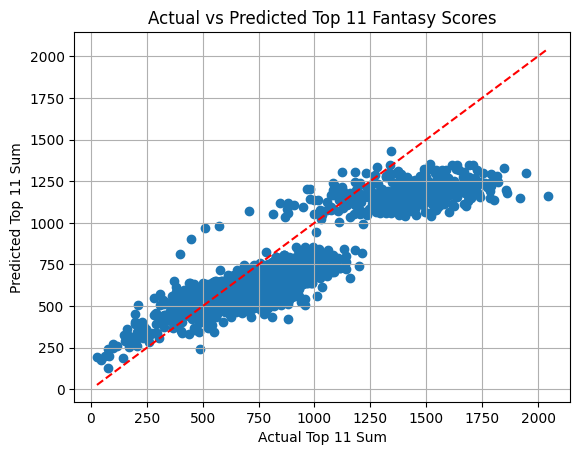

In [53]:
plt.scatter(
    eval_df['sum_top11_actual'],
    eval_df['sum_top11_predict_2'],
)
plt.plot([eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         [eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Actual vs Predicted Top 11 Fantasy Scores')

plt.grid()
plt.show()

**Validation with SHAP values**

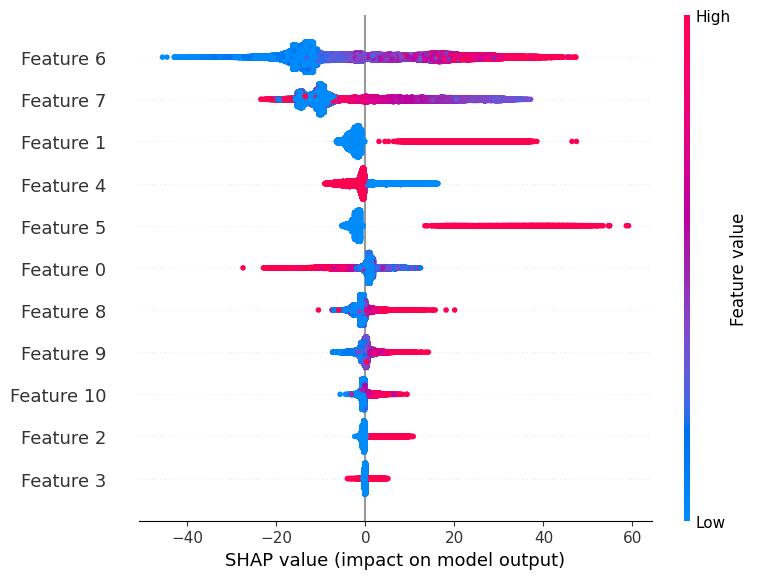

In [54]:
explainer = shap.TreeExplainer(xg2)
explain2 = explainer(X_test_sel)
shap.summary_plot(explain2, X_test_sel) # Summary Plot

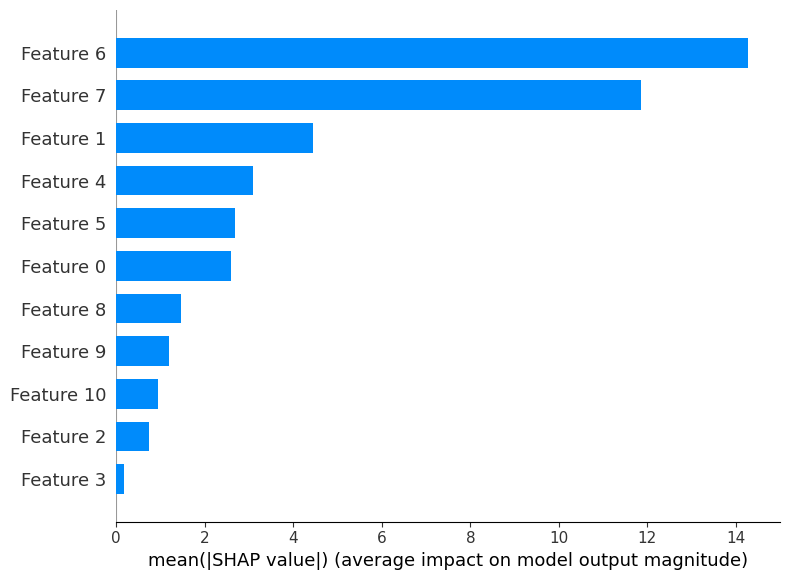

In [55]:
shap.summary_plot(explain2,X_test_sel,plot_type='bar') # Mean absolute SHAP values plot

## **Principal Component Analysis (PCA)**

In [56]:
pca = PCA(n_components=0.8)
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)
print("Number of components:", pca.n_components_)

Number of components: 15


In [57]:
xg3 = XGBRegressor(n_estimators=500, learning_rate=0.04, max_depth  = 5,random_state = 42)
xg3.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.04, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [58]:
predict_fst_3 = xg3.predict(X_test_transformed)
print("RMSE :",mean_squared_error(y_test, predict_fst_3))
print("R2 Score:", r2_score(y_test, predict_fst_3))

RMSE : 1302.63720703125
R2 Score: 0.2393028736114502


**Performance Analysis**

In [59]:
df_test['predict_fst_3'] = predict_fst_3
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,all_rounder_10,impact_bat_1,impact_bat_5,impact_bat_10,impact_bowl_1,impact_bowl_5,impact_bowl_10,predicted_fst,predicted_fst_2,predict_fst_3
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,19.371102,12.588235,11.909471,0.000000,6.450000,6.075575,6.704745,21.924402,21.271776,48.682240
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,9.976343,20.071429,12.381189,11.244889,0.000000,0.000000,0.000000,17.793270,20.673748,31.936703
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,20.188834,6.173913,6.876633,7.019944,0.000000,0.000000,0.000000,60.695557,60.152740,55.833900
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,12.194887,8.571429,0.000000,0.000000,7.437500,6.423762,0.000000,51.737450,49.880016,55.899464
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,23.076988,10.250000,12.357847,12.411139,0.000000,0.000000,0.000000,43.977154,44.190674,47.178680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,12.664247,5.923077,6.369151,6.310701,0.000000,0.000000,0.000000,43.985821,46.110592,39.666161
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,26.730006,10.153846,0.000000,0.000000,3.400000,4.080662,4.468867,73.483208,77.250008,53.884529
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,16.810381,1.818182,0.000000,0.000000,4.016129,4.928762,5.207377,55.774311,52.141155,63.277294
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,15.384954,0.000000,5.474121,7.157930,0.000000,0.000000,0.000000,52.983269,48.500816,55.372837


In [60]:
eval_df = (

    df_test.groupby('match_id').apply(

        lambda x: pd.Series({

            'sum_top11_actual' : x['fantasy_score_total'].nlargest(11).sum(),
            'sum_top11_predict_1' : x['predicted_fst'].nlargest(11).sum(),
            'sum_top11_predict_2' : x['predicted_fst_2'].nlargest(11).sum(),
            'sum_top11_predict_3' : x['predict_fst_3'].nlargest(11).sum(),

        })

    ).reset_index()

)
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2,sum_top11_predict_3
0,1336048,643.0,625.639282,608.585693,552.240662
1,1336049,745.0,656.025818,654.659607,561.429260
2,1336050,772.0,614.417297,625.149292,544.677185
3,1336051,697.0,657.206482,656.651855,548.585571
4,1336052,891.0,721.093811,724.724243,584.421753
...,...,...,...,...,...
3755,1484052,762.0,711.147644,705.573425,584.799377
3756,1485778,649.0,583.248901,585.730408,423.401520
3757,1486225,846.0,645.032898,662.575378,458.143555
3758,1486227,688.0,602.258789,594.463135,458.444122


In [61]:
eval_df['abs_%_error_3'] = (
    (eval_df['sum_top11_predict_3'] - eval_df['sum_top11_actual']).abs() /
    eval_df['sum_top11_actual']
) * 100
eval_df['_%_error_3'] = (
    (eval_df['sum_top11_predict_3'] - eval_df['sum_top11_actual']) /
    eval_df['sum_top11_actual']
) * 100
mean_abs_percentage_error = eval_df['abs_%_error_3'].mean()
mean_percentage_error = eval_df['_%_error_3'].mean()
print(f"Mean Absolute % Error: {mean_abs_percentage_error:.2f}")
print(f"Mean % Error: {mean_percentage_error:.2f}")

Mean Absolute % Error: 26.46
Mean % Error: -19.63


In [62]:
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2,sum_top11_predict_3,abs_%_error_3,_%_error_3
0,1336048,643.0,625.639282,608.585693,552.240662,14.114983,-14.114983
1,1336049,745.0,656.025818,654.659607,561.429260,24.640368,-24.640368
2,1336050,772.0,614.417297,625.149292,544.677185,29.445960,-29.445960
3,1336051,697.0,657.206482,656.651855,548.585571,21.293318,-21.293318
4,1336052,891.0,721.093811,724.724243,584.421753,34.408333,-34.408333
...,...,...,...,...,...,...,...
3755,1484052,762.0,711.147644,705.573425,584.799377,23.254675,-23.254675
3756,1485778,649.0,583.248901,585.730408,423.401520,34.760937,-34.760937
3757,1486225,846.0,645.032898,662.575378,458.143555,45.845916,-45.845916
3758,1486227,688.0,602.258789,594.463135,458.444122,33.365680,-33.365680


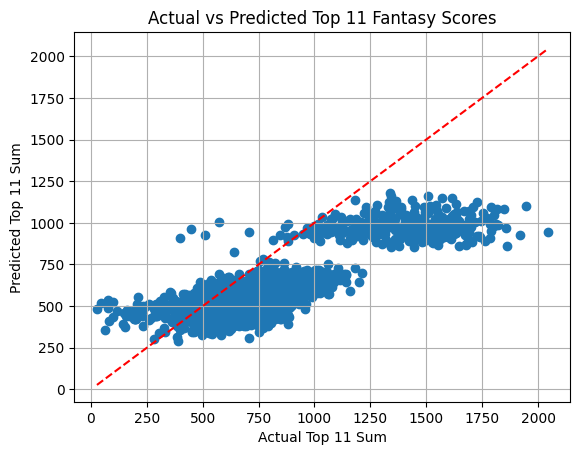

In [63]:
plt.scatter(
    eval_df['sum_top11_actual'],
    eval_df['sum_top11_predict_3'],
)
plt.plot([eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         [eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Actual vs Predicted Top 11 Fantasy Scores')

plt.grid()
plt.show()

**Validation with SHAP values**

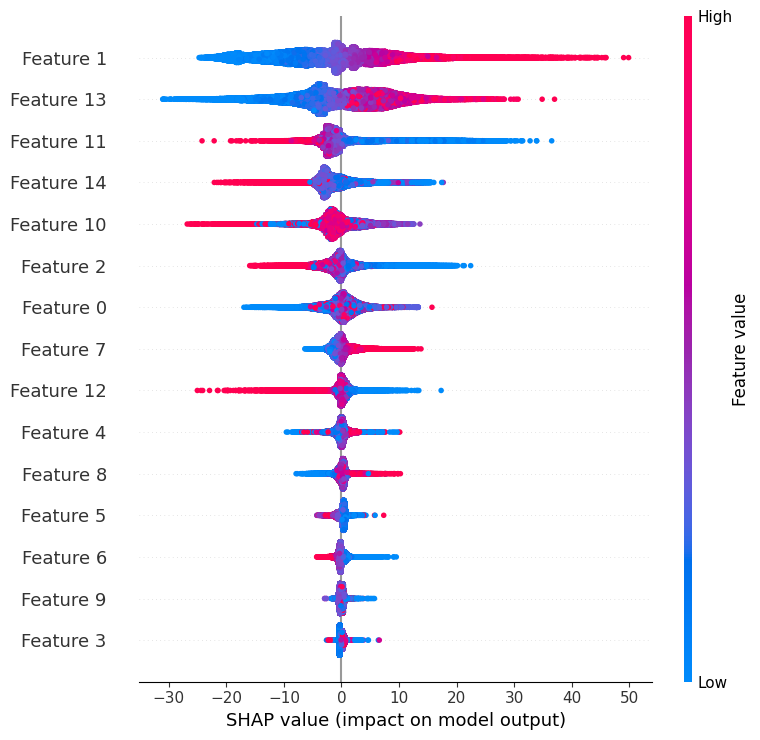

In [64]:
explainer = shap.TreeExplainer(xg3) #Summary Plot
extent3= explainer.shap_values(X_test_transformed)
shap.summary_plot(extent3, X_test_transformed)

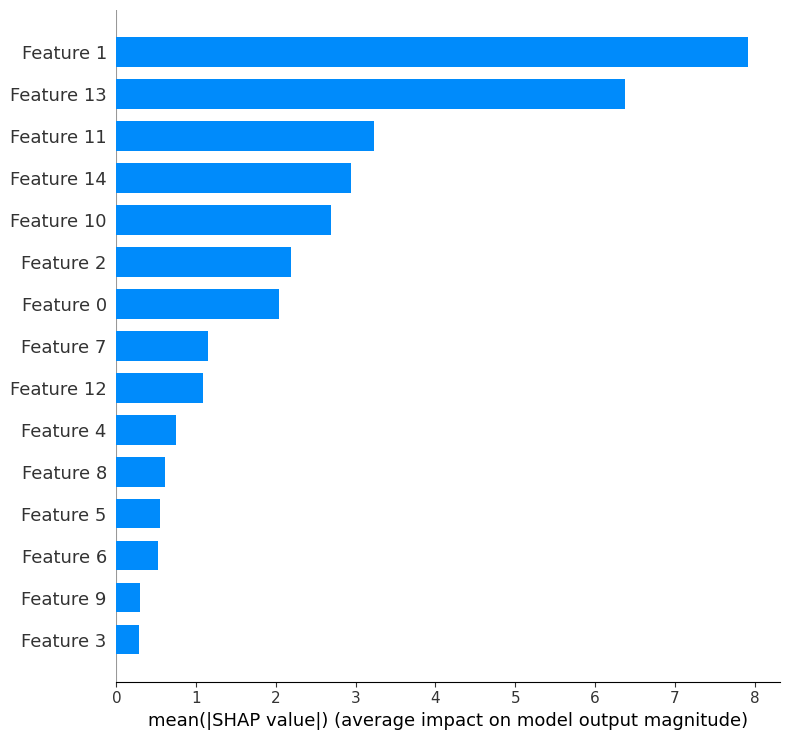

In [65]:
shap.summary_plot(extent3,X_test_transformed,plot_type='bar') # Mean absolute SHAP values plot

### **Stacking**

In [66]:
df_train

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,economy_rate_10,all_rounder_1,all_rounder_5,all_rounder_10,impact_bat_1,impact_bat_5,impact_bat_10,impact_bowl_1,impact_bowl_5,impact_bowl_10
0,11182,63963,2001-12-19,7,49,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1878,63963,2001-12-19,0,44,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,10153,63963,2001-12-19,6,84,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,11344,63963,2001-12-19,3,62,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,10707,63963,2001-12-19,2,38,0,0,0,0,1,...,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333487,9678,1377729,2023-08-20,0,56,0,0,0,1,0,...,87.457135,14.40,9.708032,10.637781,0.0,0.000000,0.000000,4.729167,5.017158,5.066719
333488,2628,1347553,2023-08-20,0,7,0,0,1,0,0,...,123.540209,7.92,6.702697,6.682755,11.0,0.000000,0.000000,5.162791,5.972344,6.923545
333489,7353,1347550,2023-08-20,0,122,0,0,1,0,0,...,0.000000,0.00,2.753214,7.907165,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
333490,2981,1347550,2023-08-20,0,135,0,0,1,0,0,...,58.677908,23.76,22.567788,22.708353,15.0,10.576231,8.564759,2.593750,3.728169,4.002677


In [67]:
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,all_rounder_10,impact_bat_1,impact_bat_5,impact_bat_10,impact_bowl_1,impact_bowl_5,impact_bowl_10,predicted_fst,predicted_fst_2,predict_fst_3
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,19.371102,12.588235,11.909471,0.000000,6.450000,6.075575,6.704745,21.924402,21.271776,48.682240
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,9.976343,20.071429,12.381189,11.244889,0.000000,0.000000,0.000000,17.793270,20.673748,31.936703
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,20.188834,6.173913,6.876633,7.019944,0.000000,0.000000,0.000000,60.695557,60.152740,55.833900
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,12.194887,8.571429,0.000000,0.000000,7.437500,6.423762,0.000000,51.737450,49.880016,55.899464
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,23.076988,10.250000,12.357847,12.411139,0.000000,0.000000,0.000000,43.977154,44.190674,47.178680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,12.664247,5.923077,6.369151,6.310701,0.000000,0.000000,0.000000,43.985821,46.110592,39.666161
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,26.730006,10.153846,0.000000,0.000000,3.400000,4.080662,4.468867,73.483208,77.250008,53.884529
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,16.810381,1.818182,0.000000,0.000000,4.016129,4.928762,5.207377,55.774311,52.141155,63.277294
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,15.384954,0.000000,5.474121,7.157930,0.000000,0.000000,0.000000,52.983269,48.500816,55.372837


**Creating Base Models**

In [68]:
bm = [
    ('lr', LinearRegression(n_jobs=-1)),
    ('ridge', Ridge(alpha=1.0)),
    ('knn', KNeighborsRegressor(n_neighbors=6,n_jobs=-1)),
    ('rf', RandomForestRegressor(n_estimators=700, random_state=42, n_jobs=-1))
    ]

**Creating Meta model**

In [69]:
meta = XGBRegressor(
    learning_rate=0.01,
    max_depth=8,
    n_estimators=650,
    subsample=0.75,
    colsample_bytree=0.7,
    reg_alpha=6,
    reg_lambda= 8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

In [70]:
stack = StackingRegressor(
    estimators=bm,
    final_estimator=meta,
    cv=5,
    passthrough= True 
)

In [ ]:
stack.fit(X_train, y_train)

In [ ]:
predicted_fst_4 = stack.predict(X_test)

**Performance Evaluation**

In [ ]:
print("RMSE:", mean_squared_error(y_test, predicted_fst_4))
print("R2 Score:", r2_score(y_test, predicted_fst_4))

RMSE: 971.2411499023438
R2 Score: 0.4328271746635437


In [ ]:
df_test['predicted_fst_4'] = predicted_fst_4
df_test

,player_id,match_id,start_date,order_seen,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,...,impact_bat_1,impact_bat_5,impact_bat_10,impact_bowl_1,impact_bowl_5,impact_bowl_10,predicted_fst,predicted_fst_2,predict_fst_3,predicted_fst_4
333492,6686,1355634,2023-08-21,0,8,0,0,0,1,0,...,12.588235,11.909471,0.000000,6.450000,6.075575,6.704745,21.924402,21.271776,48.682240,24.618710
333493,6713,1355634,2023-08-21,2,9,0,0,0,1,0,...,20.071429,12.381189,11.244889,0.000000,0.000000,0.000000,17.793270,20.673748,31.936703,16.765282
333494,11401,1393311,2023-08-21,4,85,0,0,0,1,0,...,6.173913,6.876633,7.019944,0.000000,0.000000,0.000000,60.695557,60.152740,55.833900,57.366543
333495,391,1393311,2023-08-21,0,42,0,0,0,1,0,...,8.571429,0.000000,0.000000,7.437500,6.423762,0.000000,51.737450,49.880016,55.899464,51.246452
333496,7481,1355634,2023-08-21,1,23,0,0,0,1,0,...,10.250000,12.357847,12.411139,0.000000,0.000000,0.000000,43.977154,44.190674,47.178680,41.443821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,42,0,0,1,0,0,...,5.923077,6.369151,6.310701,0.000000,0.000000,0.000000,43.985821,46.110592,39.666161,40.700890
416708,7111,1462374,2025-05-20,7,96,0,0,1,0,0,...,10.153846,0.000000,0.000000,3.400000,4.080662,4.468867,73.483208,77.250008,53.884529,68.717957
416709,10032,1462374,2025-05-20,8,13,0,0,1,0,0,...,1.818182,0.000000,0.000000,4.016129,4.928762,5.207377,55.774311,52.141155,63.277294,55.610119
416710,10220,1473500,2025-05-20,2,16,0,0,0,1,0,...,0.000000,5.474121,7.157930,0.000000,0.000000,0.000000,52.983269,48.500816,55.372837,53.309666


In [ ]:
eval_df = (

    df_test.groupby('match_id').apply(

        lambda x: pd.Series({

            'sum_top11_actual' : x['fantasy_score_total'].nlargest(11).sum(),
            'sum_top11_predict_1' : x['predicted_fst'].nlargest(11).sum(),
            'sum_top11_predict_2' : x['predicted_fst_2'].nlargest(11).sum(),
            'sum_top11_predict_3' : x['predict_fst_3'].nlargest(11).sum(),
            'sum_top11_predict_4' : x['predicted_fst_4'].nlargest(11).sum(),

        })

    ).reset_index()

)
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2,sum_top11_predict_3,sum_top11_predict_4
0,1336048,643.0,625.639282,608.585693,552.240662,586.351440
1,1336049,745.0,656.025818,654.659607,561.429260,666.251526
2,1336050,772.0,614.417297,625.149292,544.677185,623.458801
3,1336051,697.0,657.206482,656.651855,548.585571,651.316223
4,1336052,891.0,721.093811,724.724243,584.421753,752.347900
...,...,...,...,...,...,...
3755,1484052,762.0,711.147644,705.573425,584.799377,724.369080
3756,1485778,649.0,583.248901,585.730408,423.401520,592.431763
3757,1486225,846.0,645.032898,662.575378,458.143555,659.520447
3758,1486227,688.0,602.258789,594.463135,458.444122,602.916931


In [ ]:
eval_df['abs_%_error_4'] = (
    (eval_df['sum_top11_predict_4'] - eval_df['sum_top11_actual']).abs() /
    eval_df['sum_top11_actual']
) * 100
eval_df['_%_error_4'] = (
    (eval_df['sum_top11_predict_4'] - eval_df['sum_top11_actual']) /
    eval_df['sum_top11_actual']
) * 100
mean_abs_percentage_error = eval_df['abs_%_error_4'].mean()
mean_percentage_error = eval_df['_%_error_4'].mean()
print(f"Mean Absolute % Error: {mean_abs_percentage_error:.2f}")
print(f"Mean % Error: {mean_percentage_error:.2f}")

Mean Absolute % Error: 16.75
Mean % Error: -10.93


In [ ]:
eval_df

,match_id,sum_top11_actual,sum_top11_predict_1,sum_top11_predict_2,sum_top11_predict_3,sum_top11_predict_4,abs_%_error_4,_%_error_4
0,1336048,643.0,625.639282,608.585693,552.240662,586.351440,8.810040,-8.810040
1,1336049,745.0,656.025818,654.659607,561.429260,666.251526,10.570265,-10.570265
2,1336050,772.0,614.417297,625.149292,544.677185,623.458801,19.241088,-19.241088
3,1336051,697.0,657.206482,656.651855,548.585571,651.316223,6.554344,-6.554344
4,1336052,891.0,721.093811,724.724243,584.421753,752.347900,15.561403,-15.561403
...,...,...,...,...,...,...,...,...
3755,1484052,762.0,711.147644,705.573425,584.799377,724.369080,4.938441,-4.938441
3756,1485778,649.0,583.248901,585.730408,423.401520,592.431763,8.716215,-8.716215
3757,1486225,846.0,645.032898,662.575378,458.143555,659.520447,22.042500,-22.042500
3758,1486227,688.0,602.258789,594.463135,458.444122,602.916931,12.366725,-12.366725


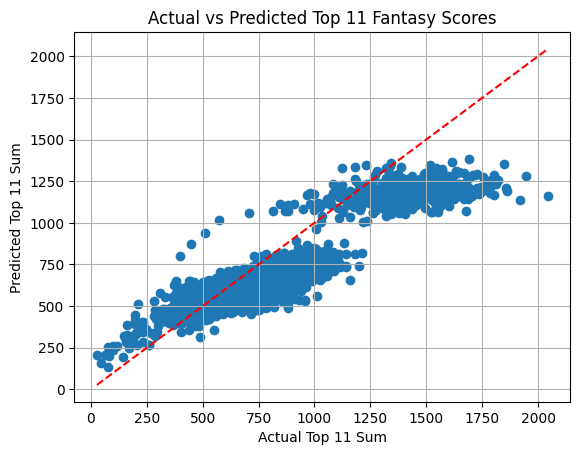

In [ ]:
plt.scatter(
    eval_df['sum_top11_actual'],
    eval_df['sum_top11_predict_4'],
)
plt.plot([eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         [eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Actual vs Predicted Top 11 Fantasy Scores')
plt.grid()
plt.show()

## **Inference function**

In [85]:
def get_top11_players(match_id, match_date, df_features, model, label_encoder):
    match_date = pd.to_datetime(match_date)
    player_rows = df_features[df_features['match_id'] == match_id]
    if player_rows.empty:
        raise ValueError(f"No data found for match_id: {match_id}")

    encoded_ids = player_rows['player_id'].unique()
    trainable = df_features[
        (df_features['player_id'].isin(encoded_ids)) &
        (df_features['start_date'] < match_date)
    ]
    if trainable.empty:
        raise ValueError("No training data found for these players before the match date.")

    latest_rows = trainable.sort_values(by="start_date").groupby("player_id").tail(1)
    X = latest_rows.drop(columns=['fantasy_score_total', 'match_id', 'start_date'], errors='ignore')
    latest_rows['predicted_score'] = model.predict(X)
    latest_rows['original_player_id'] = label_encoder.inverse_transform(latest_rows['player_id'])
    top11_players = latest_rows.sort_values(by='predicted_score', ascending=False).head(11)

    return top11_players[['original_player_id', 'predicted_score', 'fantasy_score_total']].rename(
        columns={'original_player_id': 'player_id', 'fantasy_score_total': 'actual_score'}
    )

In [86]:
match_id = '1462374'	
match_date = "2025-05-20"

top11 = get_top11_players(match_id, match_date, df_features, xg, lbenc)
print(top11)

       player_id  predicted_score  actual_score
415653  9b3bcca4        93.657127            43
415759  287ed3a0        81.622925           182
415805  f13d3eba        69.499466           100
415672  091001f8        67.234535            90
415751  2ca65aee        65.056366            40
415662  db362015        62.815498            70
415703  5f86ce69        53.962978            76
415731  00823a96        45.955017            44
415608  e19307f3        44.686604            98
384322  2dece89c        44.641888            49
415748  d8c6a647        44.010529             8
